In [1]:
import os
import numpy as np
import pandas as pd

# Define the directory path where the txt files are located
directory_path = 'model_data'

# Create an empty dictionary to hold the data from all txt files
data_dict = {}

# Loop through all files in the directory
for filename in os.listdir(directory_path):
    # Check if the file is a txt file
    if filename.endswith('.txt'):
        # Read the data from the file using numpy.loadtxt()
        file_path = os.path.join(directory_path, filename)
        data = np.loadtxt(file_path)
        
        # Create a pandas DataFrame to hold the data
        df = pd.DataFrame(data, columns=['Z_list', 'L_x', 'em_tot', 'avg_tot', 'n_tot', 'integral_results_z_tot'])
        
        # Add the DataFrame to the dictionary with the filename as the key
        data_dict[filename] = df

# Access the data for a specific file using the filename as the key
data = data_dict['AMPLE_Blazar.txt']
print(data["integral_results_z_tot"])


0     1.954067e-39
1     1.865214e-39
2     1.780043e-39
3     1.697830e-39
4     1.617391e-39
5     1.536884e-39
6     1.453177e-39
7     1.360129e-39
8     1.246818e-39
9     1.102211e-39
10    9.213088e-40
11    6.993310e-40
12    4.419526e-40
13    2.074020e-40
14    7.170956e-41
15    2.078570e-41
16    5.639165e-42
17    1.499282e-42
18    3.963264e-43
19    1.045987e-43
20    2.759351e-44
21    7.278370e-45
22    1.919759e-45
23    5.063550e-46
24    1.335557e-46
25    3.522650e-47
26    9.291298e-48
27    2.450661e-48
28    6.463834e-49
29    1.704893e-49
Name: integral_results_z_tot, dtype: float64


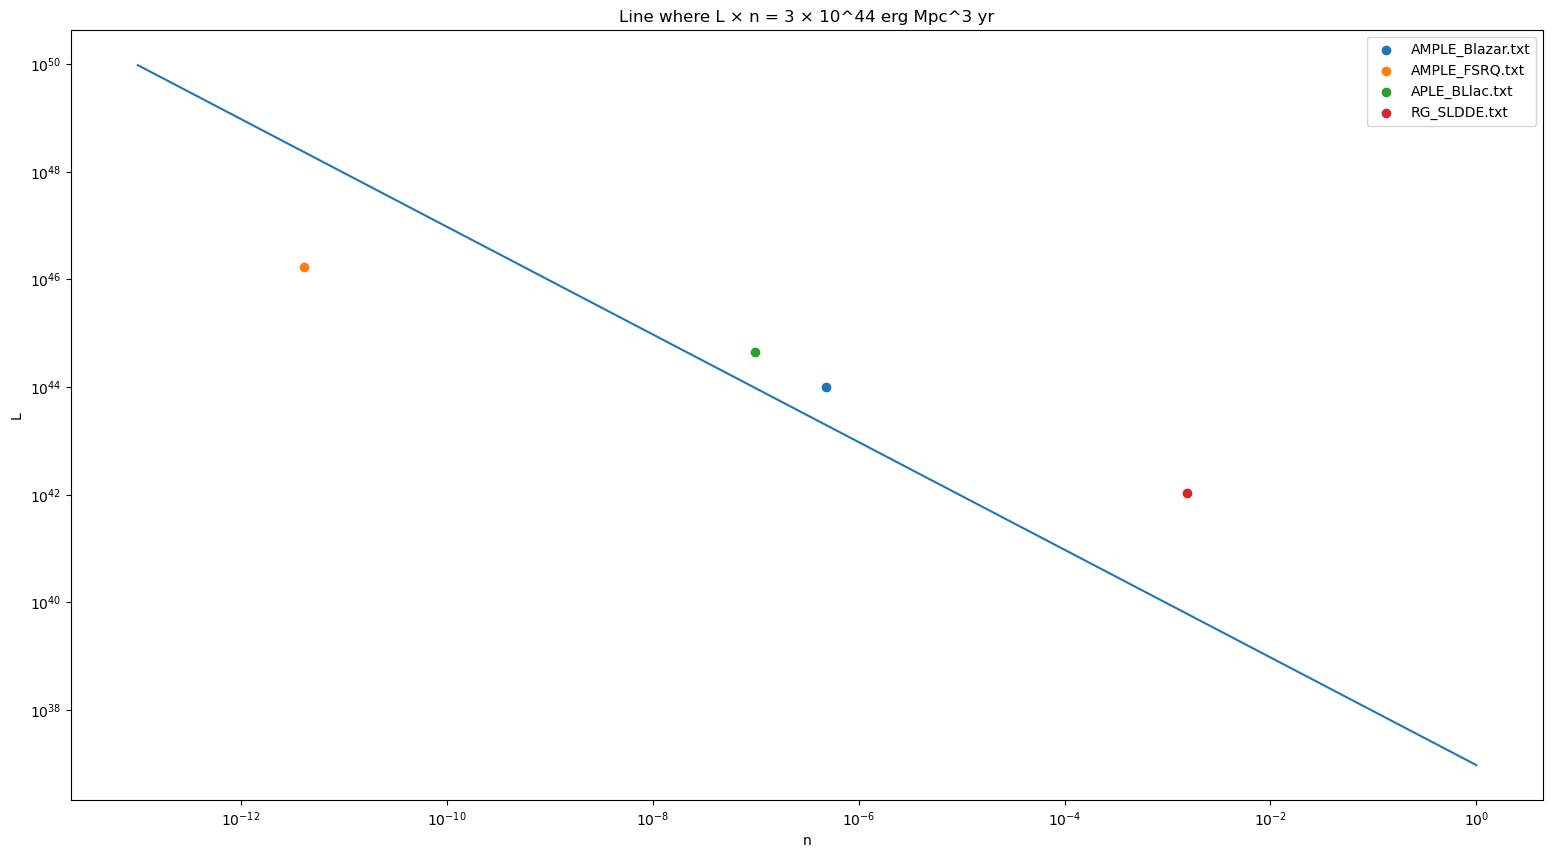

In [2]:

diffuse_flux_UHECR = 6*10**(17) #ev
import matplotlib.pyplot as plt

# Loop through all files in the dictionary

#


# Define the value of n
n_values = np.logspace(-13, 0, 1000)

# Calculate the corresponding values of L
L_values = (3 * 10**44) / n_values/(60*60*24*365)

# Plot the line
plt.figure(1, figsize=(19,10))
plt.plot(n_values, L_values)
for filename, df in data_dict.items():
    # Extract the required data
    n_z_tot = df['n_tot'][0]
    avg_tot = df['avg_tot'][0]
    
    # Plot the data
    plt.scatter(n_z_tot, avg_tot, label=filename)


plt.xlabel('n')
plt.yscale('log',base=10)
plt.xscale('log',base=10)
plt.ylabel('L')
plt.title('Line where L × n = 3 × 10^44 erg Mpc^3 yr')
plt.legend()
# Show the plot
plt.show()


